In [1]:
from pylab import *
from scipy.integrate import *

In [2]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

def mov_planet(t,x):
    # x es x,y,vx,vy
    dx = x[2]
    dy = x[3]
    d32xy = (x[0]**2 + x[1]**2)**1.5
    dvx = -x[0]/d32xy
    dvy = -x[1]/d32xy
    return array([ dx , dy , dvx , dvy ])

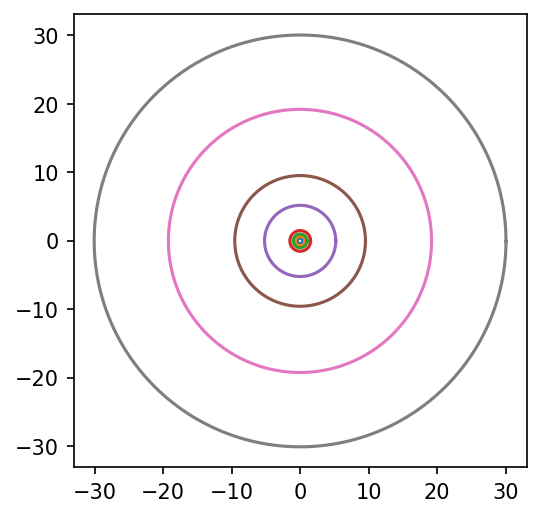

In [3]:
dist_p = [0.39,0.72,1.0,1.52,5.2,9.54,19.19,30.06]
per_p = [0.24,0.615,1.0,1.88,11.86,29.46,84.01,164.79]
figure(dpi=150)
for i in range(len(dist_p)):
    ci = [dist_p[i],0,0,dist_p[i]/per_p[i]]
    tray_p = RK4(mov_planet,(0,2*pi*per_p[i]),ci)
    plot(tray_p[1][0],tray_p[1][1])
gca().set_aspect('equal')
show()

In [4]:
yr = 5
i = 2
ci = [dist_p[i],0,0,dist_p[i]/per_p[i]]
tray_p = RK4(mov_planet,(0,2*pi*yr),ci)
datos = zeros((len(tray_p[0]),2,2))
datos[:,0,0] , datos[:,1,0] = tray_p[1][0] , tray_p[1][1]

i = 3 
ci = [dist_p[i],0,0,dist_p[i]/per_p[i]]
tray_p = RK4(mov_planet,(0,2*pi*yr),ci)
datos[:,0,1] , datos[:,1,1] = tray_p[1][0] , tray_p[1][1]

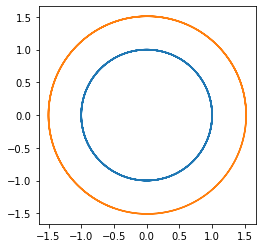

In [5]:
plot(datos[:,0,0] , datos[:,1,0])
plot(datos[:,0,1] , datos[:,1,1])

gca().set_aspect('equal')

show()

1.6248237512588433


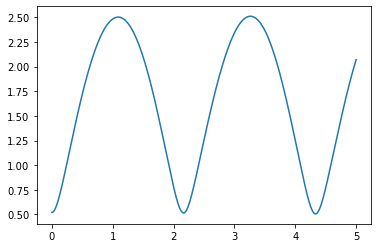

In [6]:
dist_ab = sqrt( (datos[:,0,0]-datos[:,0,1])**2 + (datos[:,1,0]-datos[:,1,1])**2 )
plot(tray_p[0]/(2*pi),dist_ab)
print(simpson(dist_ab,tray_p[0])/(2*pi*yr))
show()

In [7]:
def dist_planeta_Tierra(dist_p,per_p,ciclos=10):
    yr = ciclos # Tiempo de simulacion
    # Referencia de la Tierra
    ci = [1,0,0,1]
    tray_p = RK4(mov_planet,(0,2*pi*yr),ci)
    datos = zeros((len(tray_p[0]),2,2)) # variable para guardar los datos
    datos[:,0,0] , datos[:,1,0] = tray_p[1][0] , tray_p[1][1]
    # Simulacion del planeta
    ci = [dist_p,0,0,dist_p/per_p]
    tray_p = RK4(mov_planet,(0,2*pi*yr),ci)
    datos[:,0,1] , datos[:,1,1] = tray_p[1][0] , tray_p[1][1]
    dist_ab = sqrt( (datos[:,0,0]-datos[:,0,1])**2 + (datos[:,1,0]-datos[:,1,1])**2 )
    tiempo_p = simpson(dist_ab,tray_p[0])/(2*pi*yr)
    return tiempo_p

In [9]:
D_planeta = [0.39,0.72,1.52,5.2,9.54,19.19,30.06]
T_planeta = [0.24,0.615,1.88,11.86,29.46,84.01,164.79]
nombre = ['Mercurio','Venus','Marte','Jupiter','Saturno','Urano','Neptuno']

for i in range(4):
    print('Distancia promedio Tierra -',nombre[i],' = ',
          dist_planeta_Tierra(D_planeta[i],T_planeta[i],500),'UA')

Distancia promedio Tierra - Mercurio  =  1.0409255836920503 UA
Distancia promedio Tierra - Venus  =  1.1311066045545506 UA
Distancia promedio Tierra - Marte  =  1.6814482737227647 UA
Distancia promedio Tierra - Jupiter  =  5.246645061107802 UA
